In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as ply

In [2]:
data = pd.read_csv("data/credit_score.csv")
data.shape

/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/ipykernel_99259/2526442051.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/credit_score.csv")


(100000, 28)

In [3]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
data.duplicated().sum()

0

In [7]:
data.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [8]:
data.Credit_Score.value_counts(), data.Credit_Score.value_counts(normalize=True)

(Credit_Score
 Standard    53174
 Poor        28998
 Good        17828
 Name: count, dtype: int64,
 Credit_Score
 Standard    0.53174
 Poor        0.28998
 Good        0.17828
 Name: proportion, dtype: float64)

# Data Cleaning

Check each feature and clean any inconsistency

In [9]:
# Customer ID
data.Customer_ID.value_counts()

Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64

In [10]:
data[data.Customer_ID=="CUS_0xd40"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard


Observations

- Fix inconsistencies for each customer (fill missing and inconsistent values wit customer majourity).

In [11]:
# Month
data.Month.value_counts()

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

In [12]:
data.Month = data.Month.astype(str)

### Name

In [13]:
data[data.Name.isna()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
17,0x161b,CUS_0x2dbc,February,NaN,34,486-85-3974,Engineer,143162.64,12187.220000,1,...,Good,1303.01,41.702573,17 Years and 10 Months,No,246.992319,232.86038375993544,High_spent_Small_value_payments,998.8692967863226,Good
22,0x1620,CUS_0x2dbc,July,NaN,34,486-85-3974,Engineer,143162.64,12187.220000,1,...,Good,1303.01,38.068624,18 Years and 3 Months,No,246.992319,263.17416316163934,High_spent_Small_value_payments,968.5555173846187,Standard
64,0x1662,CUS_0x4157,January,NaN,23,070-19-1622,Doctor,114838.41,9843.867500,2,...,Good,1377.74,33.664554,21 Years and 4 Months,No,226.892792,215.19351594560425,High_spent_Small_value_payments,802.3004421328528,Good
80,0x167a,CUS_0xa66b,January,NaN,40,221-30-8554,Teacher,33751.27,2948.605833,5,...,Standard,1328.93,37.089076,19 Years and 2 Months,NM,65.008174,117.30669710658556,High_spent_Medium_value_payments,362.54571194023237,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99964,0x25fba,CUS_0x372c,May,NaN,18,340-85-7301,Lawyer,42903.79,3468.315833,0,...,Good,1079.48,23.140640,28 Years and 5 Months,No,34.975457,450.6460933992599,Low_spent_Small_value_payments,151.210033,Good
99965,0x25fbb,CUS_0x372c,June,NaN,19,340-85-7301,Lawyer,42903.79,3468.315833,0,...,Good,1079.48,35.549456,28 Years and 6 Months,No,34.975457,187.3559686116327,Low_spent_Large_value_payments,394.500158,Good
99969,0x25fc3,CUS_0xf16,February,NaN,45,868-70-2218,Media_Manager,16680.35,1528.029167,1,...,Good,897.16,34.085971,21 Years and 2 Months,No,41.113561,104.64623687765652,High_spent_Small_value_payments,267.043119,Good
99973,0x25fc7,CUS_0xf16,June,NaN,45,868-70-2218,Media_Manager,16680.35,1528.029167,1,...,Good,897.16,24.972853,21 Years and 6 Months,No,41.113561,__10000__,Low_spent_Small_value_payments,233.301539,Good


In [50]:
from collections import Counter
import math

def fill_customer_majority(cust_df: pd.DataFrame, column: str, nan_str: str = 'nan'):
    cust_df[column] = cust_df[column].apply(lambda x: str(x))
    column_list = [col for col in cust_df[column].to_list() if col != nan_str]
    column_list = list(map(str, column_list))

    return max(set(column_list), key=column_list.count)

In [51]:
fill_customer_majority(data[data.Customer_ID=="CUS_0xd40"], "Name")

/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/ipykernel_99259/462575650.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df[column] = cust_df[column].apply(lambda x: str(x))


'Aaron Maashoh'

In [16]:
customer_name_majourity = {
    cust_id: fill_customer_majority(data[data.Customer_ID==cust_id], "Name") for cust_id in data.Customer_ID.unique().tolist()
}

/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/ipykernel_99259/2215559372.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df[column] = cust_df[column].apply(lambda x: str(x))


In [17]:
customer_name_majourity["CUS_0xd40"]

'Aaron Maashoh'

In [18]:
cleaned = data.copy(deep=True)
cleaned["Name"] = cleaned.apply(lambda x: customer_name_majourity.get(x["Customer_ID"]), axis=1)

In [19]:
cleaned.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [20]:
cleaned[cleaned.Customer_ID=="CUS_0x372c"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99960,0x25fb6,CUS_0x372c,January,Lucia Mutikanik,18,340-85-7301,Lawyer,42903.79,3468.315833,0,...,Good,1079.48,27.289440,28 Years and 1 Months,No,50894.000000,78.51494451125625,High_spent_Small_value_payments,493.341182,Good
99961,0x25fb7,CUS_0x372c,February,Lucia Mutikanik,18,340-85-7301,Lawyer,42903.79,3468.315833,0,...,Good,1079.48,33.494867,28 Years and 2 Months,No,34.975457,NaN,High_spent_Medium_value_payments,484.416627,Good
99962,0x25fb8,CUS_0x372c,March,Lucia Mutikanik,18,340-85-7301,Lawyer,42903.79,3468.315833,0,...,_,1079.48,31.738359,28 Years and 3 Months,No,34.975457,114.8504246633256,High_spent_Small_value_payments,457.005702,Good
99963,0x25fb9,CUS_0x372c,April,Lucia Mutikanik,-500,340-85-7301,Lawyer,42903.79,NaN,0,...,Good,1079.48,30.625298,NaN,No,34.975457,31.19391926667726,High_spent_Large_value_payments,520.662207,Standard
99964,0x25fba,CUS_0x372c,May,Lucia Mutikanik,18,340-85-7301,Lawyer,42903.79,3468.315833,0,...,Good,1079.48,23.140640,28 Years and 5 Months,No,34.975457,450.6460933992599,Low_spent_Small_value_payments,151.210033,Good
99965,0x25fbb,CUS_0x372c,June,Lucia Mutikanik,19,340-85-7301,Lawyer,42903.79,3468.315833,0,...,Good,1079.48,35.549456,28 Years and 6 Months,No,34.975457,187.3559686116327,Low_spent_Large_value_payments,394.500158,Good
99966,0x25fbc,CUS_0x372c,July,Lucia Mutikanik,19,340-85-7301,Lawyer,42903.79,3468.315833,0,...,Good,1079.48,35.123480,28 Years and 7 Months,No,34.975457,240.87379807398983,Low_spent_Medium_value_payments,350.982329,Good
99967,0x25fbd,CUS_0x372c,August,Lucia Mutikanik,19,340-85-7301,Lawyer,42903.79,3468.315833,0,...,Good,1079.48,35.716618,28 Years and 8 Months,No,34.975457,115.18498444443384,High_spent_Medium_value_payments,446.671142,Good


### Age

In [25]:
# remove all alphabet, special characters
import re

cleaned.Age.value_counts().iloc[:50]

Age
38      2833
28      2829
31      2806
26      2792
32      2749
25      2737
36      2720
35      2716
34      2707
27      2707
39      2705
44      2688
19      2650
22      2641
41      2638
43      2605
37      2605
20      2603
30      2602
21      2594
29      2575
24      2553
23      2537
45      2501
40      2477
42      2441
33      2429
18      2270
46      1538
15      1488
17      1438
16      1378
48      1330
49      1307
55      1299
53      1287
52      1283
54      1236
51      1224
50      1205
47      1165
14      1129
-500     886
56       348
38_      161
24_      161
29_      160
26_      153
27_      152
35_      150
Name: count, dtype: int64

In [30]:
cleaned.Age = cleaned.Age.apply(lambda x: re.sub(r"\D", "", x))
cleaned.Age = cleaned.Age.astype(int)

In [31]:
cleaned.Age.value_counts().iloc[:50]

Age
38      2994
28      2968
31      2955
26      2945
32      2884
36      2868
35      2866
25      2861
27      2859
39      2846
34      2837
44      2824
19      2793
22      2785
41      2785
20      2744
37      2742
29      2735
43      2734
30      2727
21      2716
24      2714
23      2654
45      2642
40      2609
42      2577
33      2543
18      2385
46      1621
15      1574
17      1502
16      1455
48      1385
49      1375
55      1366
52      1356
53      1354
54      1311
51      1291
50      1273
47      1227
14      1175
500      886
56       362
6799       4
3640       3
2650       3
2546       3
5579       3
6381       3
Name: count, dtype: int64

In [33]:
cleaned.Age[cleaned.Age>100] = np.nan

/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/ipykernel_99259/2388455924.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cleaned.Age[cleaned.Age>100] = np.nan
/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/ipykernel_99259/2388455924

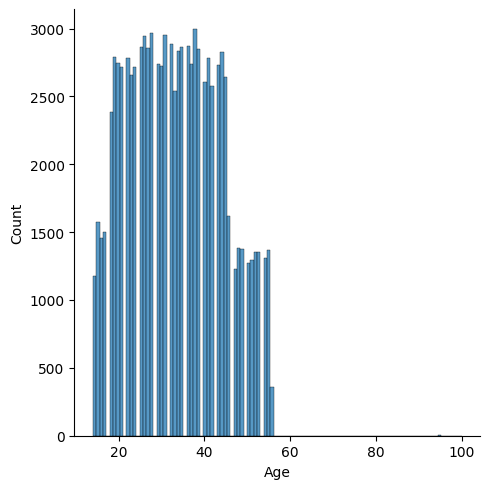

In [37]:
sns.displot(cleaned.Age)

**We'd handle the missing values later**

### Occupation

In [38]:
cleaned.Occupation.value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [40]:
cleaned.Occupation[cleaned.Occupation=="_______"] = "unknown_occupation"

/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/ipykernel_99259/261021784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned.Occupation[cleaned.Occupation=="_______"] = "unknown_occupation"


Create a new category to represent users with missing/faulty occupation date

In [49]:
cleaned[(cleaned.Customer_ID == "CUS_0x9e67")]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
93280,0x23892,CUS_0x9e67,January,Marias,24.0,366-87-4584,unknown_occupation,44393.86,3504.488333,6,...,_,1270.97,37.328326,NaN,Yes,63.794335,91.47043380118635,High_spent_Medium_value_payments,445.1840640677529,Standard
93281,0x23893,CUS_0x9e67,February,Marias,24.0,366-87-4584,Media_Manager,44393.86,NaN,6,...,Standard,1270.97,38.288971,20 Years and 4 Months,Yes,63.794335,48.74251133681211,High_spent_Large_value_payments,477.9119865321272,Standard
93282,0x23894,CUS_0x9e67,March,Marias,24.0,366-87-4584,unknown_occupation,44393.86_,3504.488333,6,...,_,1270.97,29.115904,20 Years and 5 Months,Yes,63.794335,73.10076082927787,High_spent_Medium_value_payments,463.5537370396614,Standard
93283,0x23895,CUS_0x9e67,April,Marias,24.0,366-87-4584,unknown_occupation,44393.86,3504.488333,6,...,_,1270.97,27.476836,NaN,Yes,63.794335,218.8494789557392,Low_spent_Small_value_payments,357.8050189132002,Standard
93284,0x23896,CUS_0x9e67,May,Marias,24.0,366-87-4584,unknown_occupation,44393.86,3504.488333,6,...,Standard,1270.97,25.366794,20 Years and 7 Months,Yes,63.794335,129.96478872285044,Low_spent_Large_value_payments,426.6897091460888,Poor
93285,0x23897,CUS_0x9e67,June,Marias,24.0,366-87-4584,Media_Manager,44393.86,NaN,6,...,_,1270.97,39.860247,20 Years and 8 Months,Yes,63.794335,182.15844474347492,High_spent_Small_value_payments,364.4960531254644,Standard
93286,0x23898,CUS_0x9e67,July,Marias,24.0,366-87-4584,unknown_occupation,44393.86,3504.488333,6,...,Standard,1270.97,33.895918,20 Years and 9 Months,Yes,63.794335,430.17172880535406,Low_spent_Small_value_payments,146.48276906358524,Poor
93287,0x23899,CUS_0x9e67,August,Marias,25.0,366-87-4584,Media_Manager,44393.86,3504.488333,6,...,Standard,1270.97,30.145633,20 Years and 10 Months,Yes,63.794335,73.09873138982826,High_spent_Medium_value_payments,463.55576647911107,Poor


In [54]:
customer_occupation_majourity = {
    cust_id: fill_customer_majority(data[data.Customer_ID==cust_id], "Occupation", "_______") for cust_id in data.Customer_ID.unique().tolist()
}

/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/ipykernel_99259/462575650.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df[column] = cust_df[column].apply(lambda x: str(x))


In [55]:
customer_occupation_majourity["CUS_0x9e67"]

'Media_Manager'

In [56]:
cleaned["Occupation"] = cleaned.apply(lambda x: customer_occupation_majourity.get(x["Customer_ID"]), axis=1)

In [57]:
cleaned[(cleaned.Customer_ID == "CUS_0x9e67")]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
93280,0x23892,CUS_0x9e67,January,Marias,24.0,366-87-4584,Media_Manager,44393.86,3504.488333,6,...,_,1270.97,37.328326,NaN,Yes,63.794335,91.47043380118635,High_spent_Medium_value_payments,445.1840640677529,Standard
93281,0x23893,CUS_0x9e67,February,Marias,24.0,366-87-4584,Media_Manager,44393.86,NaN,6,...,Standard,1270.97,38.288971,20 Years and 4 Months,Yes,63.794335,48.74251133681211,High_spent_Large_value_payments,477.9119865321272,Standard
93282,0x23894,CUS_0x9e67,March,Marias,24.0,366-87-4584,Media_Manager,44393.86_,3504.488333,6,...,_,1270.97,29.115904,20 Years and 5 Months,Yes,63.794335,73.10076082927787,High_spent_Medium_value_payments,463.5537370396614,Standard
93283,0x23895,CUS_0x9e67,April,Marias,24.0,366-87-4584,Media_Manager,44393.86,3504.488333,6,...,_,1270.97,27.476836,NaN,Yes,63.794335,218.8494789557392,Low_spent_Small_value_payments,357.8050189132002,Standard
93284,0x23896,CUS_0x9e67,May,Marias,24.0,366-87-4584,Media_Manager,44393.86,3504.488333,6,...,Standard,1270.97,25.366794,20 Years and 7 Months,Yes,63.794335,129.96478872285044,Low_spent_Large_value_payments,426.6897091460888,Poor
93285,0x23897,CUS_0x9e67,June,Marias,24.0,366-87-4584,Media_Manager,44393.86,NaN,6,...,_,1270.97,39.860247,20 Years and 8 Months,Yes,63.794335,182.15844474347492,High_spent_Small_value_payments,364.4960531254644,Standard
93286,0x23898,CUS_0x9e67,July,Marias,24.0,366-87-4584,Media_Manager,44393.86,3504.488333,6,...,Standard,1270.97,33.895918,20 Years and 9 Months,Yes,63.794335,430.17172880535406,Low_spent_Small_value_payments,146.48276906358524,Poor
93287,0x23899,CUS_0x9e67,August,Marias,25.0,366-87-4584,Media_Manager,44393.86,3504.488333,6,...,Standard,1270.97,30.145633,20 Years and 10 Months,Yes,63.794335,73.09873138982826,High_spent_Medium_value_payments,463.55576647911107,Poor


### Annual income

In [68]:
cleaned.Annual_Income = cleaned.Annual_Income.apply(lambda x: ' '.join(re.findall(r'\d+\.\d+|\d+', x)))
cleaned.Annual_Income = cleaned.Annual_Income.astype(float)

In [69]:
cleaned.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,97224.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,33.323274,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,10.778909,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,14.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,24.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,33.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,100.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [77]:
cleaned["Annual_Income_cleaned"] = np.log(cleaned["Annual_Income"])

<Axes: xlabel='Annual_Income', ylabel='Count'>

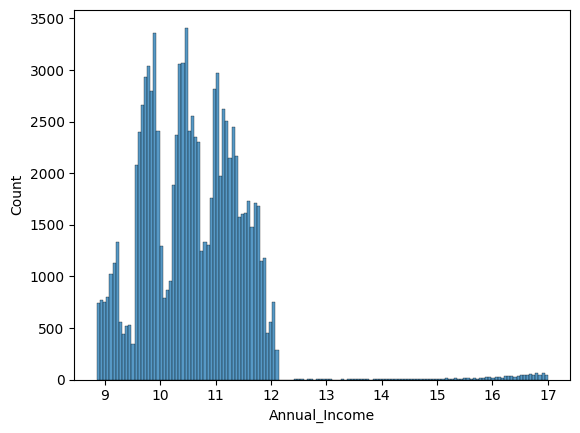

In [75]:
sns.histplot(np.log(cleaned["Annual_Income"]))

<Axes: ylabel='Annual_Income'>

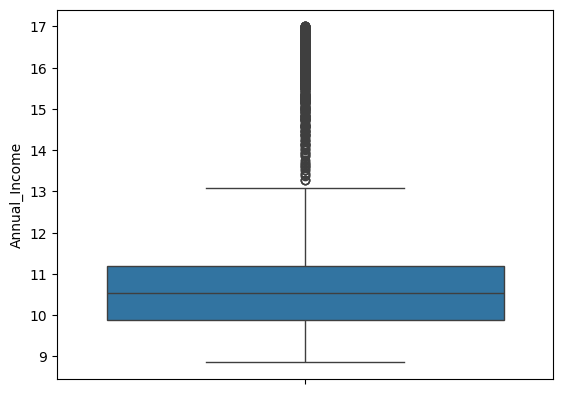

In [76]:
sns.boxplot(np.log(cleaned["Annual_Income"]))

### Monthly_Inhand_Salary

In [82]:
cleaned[(cleaned.Monthly_Inhand_Salary.isna())].Customer_ID.value_counts()

Customer_ID
CUS_0x1e87    6
CUS_0x766b    6
CUS_0xb28a    6
CUS_0x6c9b    5
CUS_0x4242    5
             ..
CUS_0x7d93    1
CUS_0x7974    1
CUS_0x8359    1
CUS_0x4cab    1
CUS_0xaf61    1
Name: count, Length: 9099, dtype: int64

In [83]:
customer_mis_majourity = {
    cust_id: fill_customer_majority(data[data.Customer_ID==cust_id], "Monthly_Inhand_Salary", "nan") for cust_id in data.Customer_ID.unique().tolist()
}
customer_mis_majourity["CUS_0x9e67"]

/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/ipykernel_99259/462575650.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df[column] = cust_df[column].apply(lambda x: str(x))


'3504.4883333333332'

In [84]:
cleaned["Monthly_Inhand_Salary"] = cleaned.apply(lambda x: customer_mis_majourity.get(x["Customer_ID"]), axis=1)

In [86]:
cleaned[(cleaned.Customer_ID == "CUS_0x9e67")]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Annual_Income_cleaned
93280,0x23892,CUS_0x9e67,January,Marias,24.0,366-87-4584,Media_Manager,44393.86,3504.4883333333332,6,...,1270.97,37.328326,NaN,Yes,63.794335,91.47043380118635,High_spent_Medium_value_payments,445.1840640677529,Standard,10.700856
93281,0x23893,CUS_0x9e67,February,Marias,24.0,366-87-4584,Media_Manager,44393.86,3504.4883333333332,6,...,1270.97,38.288971,20 Years and 4 Months,Yes,63.794335,48.74251133681211,High_spent_Large_value_payments,477.9119865321272,Standard,10.700856
93282,0x23894,CUS_0x9e67,March,Marias,24.0,366-87-4584,Media_Manager,44393.86,3504.4883333333332,6,...,1270.97,29.115904,20 Years and 5 Months,Yes,63.794335,73.10076082927787,High_spent_Medium_value_payments,463.5537370396614,Standard,10.700856
93283,0x23895,CUS_0x9e67,April,Marias,24.0,366-87-4584,Media_Manager,44393.86,3504.4883333333332,6,...,1270.97,27.476836,NaN,Yes,63.794335,218.8494789557392,Low_spent_Small_value_payments,357.8050189132002,Standard,10.700856
93284,0x23896,CUS_0x9e67,May,Marias,24.0,366-87-4584,Media_Manager,44393.86,3504.4883333333332,6,...,1270.97,25.366794,20 Years and 7 Months,Yes,63.794335,129.96478872285044,Low_spent_Large_value_payments,426.6897091460888,Poor,10.700856
93285,0x23897,CUS_0x9e67,June,Marias,24.0,366-87-4584,Media_Manager,44393.86,3504.4883333333332,6,...,1270.97,39.860247,20 Years and 8 Months,Yes,63.794335,182.15844474347492,High_spent_Small_value_payments,364.4960531254644,Standard,10.700856
93286,0x23898,CUS_0x9e67,July,Marias,24.0,366-87-4584,Media_Manager,44393.86,3504.4883333333332,6,...,1270.97,33.895918,20 Years and 9 Months,Yes,63.794335,430.17172880535406,Low_spent_Small_value_payments,146.48276906358524,Poor,10.700856
93287,0x23899,CUS_0x9e67,August,Marias,25.0,366-87-4584,Media_Manager,44393.86,3504.4883333333332,6,...,1270.97,30.145633,20 Years and 10 Months,Yes,63.794335,73.09873138982826,High_spent_Medium_value_payments,463.55576647911107,Poor,10.700856


### Num_Bank_Accounts

In [87]:
cleaned.Num_Bank_Accounts.value_counts()

Num_Bank_Accounts
6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
1626        1
1470        1
887         1
211         1
697         1
Name: count, Length: 943, dtype: int64

In [94]:
cleaned.Num_Bank_Accounts[(cleaned.Num_Bank_Accounts>10)] = 11
cleaned.Num_Bank_Accounts[(cleaned.Num_Bank_Accounts==-1)] = 1

/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/ipykernel_99259/1717814927.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cleaned.Num_Bank_Accounts[(cleaned.Num_Bank_Accounts>10)] = 11
/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/i

Change users with bank accounts greater than 10 to '11'.

In [95]:
cleaned.Num_Bank_Accounts.value_counts()

Num_Bank_Accounts
6     13001
7     12823
8     12765
4     12186
5     12118
3     11950
9      5443
10     5247
1      4511
0      4328
2      4304
11     1324
Name: count, dtype: int64

### Num_Credit_Card

In [96]:
cleaned.Num_Credit_Card.value_counts()

Num_Credit_Card
5       18459
7       16615
6       16559
4       14030
3       13277
        ...  
791         1
1118        1
657         1
640         1
679         1
Name: count, Length: 1179, dtype: int64

In [103]:
cleaned.Num_Credit_Card[(cleaned.Num_Credit_Card>11)]

10       1385
40       1288
157      1029
163       488
207      1381
         ... 
99611     514
99615     232
99619    1430
99769     679
99811     158
Name: Num_Credit_Card, Length: 2271, dtype: int64

In [104]:
cleaned.Num_Credit_Card[(cleaned.Num_Credit_Card>10)] = 11
# cleaned.Num_Credit_Card[(cleaned.Num_Credit_Card==-1)] = 1

/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/ipykernel_99259/3052258222.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cleaned.Num_Credit_Card[(cleaned.Num_Credit_Card>10)] = 11
/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/ipyke

Change users with bank accounts greater than 10 to '11'.

In [105]:
cleaned.Num_Credit_Card.value_counts()

Num_Credit_Card
5     18459
7     16615
6     16559
4     14030
3     13277
8      4956
10     4860
9      4643
11     2307
2      2149
1      2132
0        13
Name: count, dtype: int64

### Interest_Rate

In [106]:
cleaned.Interest_Rate.value_counts()

Interest_Rate
8       5012
5       4979
6       4721
12      4540
10      4540
        ... 
4995       1
1899       1
2120       1
5762       1
5729       1
Name: count, Length: 1750, dtype: int64

In [119]:
cleaned.Interest_Rate[(cleaned.Interest_Rate>50)] = 50

/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/ipykernel_99259/3294562627.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cleaned.Interest_Rate[(cleaned.Interest_Rate>50)] = 50
/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/ipykernel

In [120]:
cleaned.Interest_Rate.value_counts()

Interest_Rate
8     5012
5     4979
6     4721
12    4540
10    4540
9     4494
7     4494
11    4428
18    4102
15    3992
20    3929
17    3813
16    3730
19    3630
3     2765
1     2683
4     2589
2     2465
13    2384
14    2229
50    2034
32    1742
22    1720
30    1690
24    1685
23    1683
29    1662
28    1616
27    1608
25    1566
21    1560
34    1502
26    1489
33    1467
31    1457
Name: count, dtype: int64

### Num_of_Loan

In [128]:
cleaned.Num_of_Loan.value_counts()

Num_of_Loan
3        14386
2        14250
4        14016
0        10380
1        10083
         ...  
1320_        1
103          1
1444         1
392          1
966          1
Name: count, Length: 434, dtype: int64

In [129]:
cleaned.Num_of_Loan = cleaned.Num_of_Loan.apply(lambda x: re.sub(r"\D", "", x))
cleaned.Num_of_Loan = cleaned.Num_of_Loan.astype(int)

In [133]:
cleaned.Num_of_Loan[(cleaned.Num_of_Loan>1000)] = 1001

/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/ipykernel_99259/3238690506.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cleaned.Num_of_Loan[(cleaned.Num_of_Loan>1000)] = 1001
/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/ipykernel

### Delay_from_due_date

In [134]:
cleaned.Delay_from_due_date.value_counts()

Delay_from_due_date
 15    3596
 13    3424
 8     3324
 14    3313
 10    3281
       ... 
-4       62
 65      56
-5       33
 66      32
 67      22
Name: count, Length: 73, dtype: int64

### Changed_Credit_Limit

In [135]:
cleaned.Changed_Credit_Limit.value_counts()

Changed_Credit_Limit
_                     2091
8.22                   133
11.5                   127
11.32                  126
7.35                   121
                      ... 
-1.84                    1
0.8899999999999999       1
28.06                    1
1.5599999999999996       1
21.17                    1
Name: count, Length: 4384, dtype: int64

In [138]:
cleaned.Changed_Credit_Limit.loc[cleaned.Changed_Credit_Limit=='_'] = np.nan

/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/ipykernel_99259/2862557563.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cleaned.Changed_Credit_Limit.loc[cleaned.Changed_Credit_Limit=='_'] = np.nan
/var/folders/yd/36hqj6y53ks959xgzn2k

### Credit_Mix

In [139]:
cleaned.Credit_Mix.value_counts()

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

In [141]:
cleaned.Credit_Mix.loc[cleaned.Credit_Mix=='_'] = "unknown"

/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/ipykernel_99259/1301407644.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cleaned.Credit_Mix.loc[cleaned.Credit_Mix=='_'] = "unknown"
/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/ipyk

In [142]:
cleaned.Credit_Mix.value_counts()

Credit_Mix
Standard    36479
Good        24337
unknown     20195
Bad         18989
Name: count, dtype: int64

### Outstanding_Debt

In [143]:
cleaned.Outstanding_Debt.value_counts()

Outstanding_Debt
1360.45     24
460.46      23
1151.7      23
1109.03     23
467.7       16
            ..
245.46_      1
645.77_      1
174.79_      1
1181.13_     1
1013.53_     1
Name: count, Length: 13178, dtype: int64

In [144]:
cleaned.Outstanding_Debt = cleaned.Outstanding_Debt.apply(lambda x: ' '.join(re.findall(r'\d+\.\d+|\d+', x)))
cleaned.Outstanding_Debt = cleaned.Outstanding_Debt.astype(float)

In [145]:
cleaned.Outstanding_Debt.value_counts()

Outstanding_Debt
1109.03    24
1151.70    24
1360.45    24
460.46     24
1058.13    16
           ..
4230.04     8
641.99      8
98.61       8
2614.48     8
502.38      8
Name: count, Length: 12203, dtype: int64

### Credit_Utilization_Ratio

In [146]:
cleaned.Credit_Utilization_Ratio.value_counts()

Credit_Utilization_Ratio
26.822620    1
28.327949    1
30.016576    1
25.478841    1
33.933755    1
            ..
30.687138    1
38.730069    1
30.017515    1
27.279794    1
34.192463    1
Name: count, Length: 100000, dtype: int64

### Total_EMI_per_month

In [147]:
cleaned.Total_EMI_per_month.value_counts()

Total_EMI_per_month
0.000000        10613
49.574949           8
73.533361           8
22.960835           8
38.661127           8
                ...  
36408.000000        1
23760.000000        1
24612.000000        1
24325.000000        1
58638.000000        1
Name: count, Length: 14950, dtype: int64

### Payment_Behaviour

In [149]:
cleaned.Payment_Behaviour.value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [151]:
cleaned.loc[cleaned.Payment_Behaviour=="!@9#%8", "Payment_Behaviour"] = "unknown"

In [152]:
cleaned.Payment_Behaviour.value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
unknown                              7600
Name: count, dtype: int64

### Monthly_Balance

In [163]:
cleaned.Monthly_Balance.value_counts()

Monthly_Balance
__-333333333333333333333333333__    9
312.49408867943663                  1
415.32532309844316                  1
252.08489793906085                  1
254.9709216273975                   1
                                   ..
366.2890379762706                   1
151.1882696261166                   1
306.75027851710234                  1
278.8720257394474                   1
393.673696                          1
Name: count, Length: 98792, dtype: int64

In [164]:
cleaned.loc[cleaned.Monthly_Balance=="__-333333333333333333333333333__", "Monthly_Balance"] = -3.0

In [165]:
cleaned.Monthly_Balance.value_counts()

Monthly_Balance
-3.0                   9
 312.49408867943663    1
 415.32532309844316    1
 252.08489793906085    1
 254.9709216273975     1
                      ..
 366.2890379762706     1
 151.1882696261166     1
 306.75027851710234    1
 278.8720257394474     1
 393.673696            1
Name: count, Length: 98792, dtype: int64

In [166]:
cleaned.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Annual_Income_cleaned'],
      dtype='object')

In [167]:
columns = [
    'ID', 'Customer_ID', 'Month', 'Age','Occupation','Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts','Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
    'Delay_from_due_date', 'Changed_Credit_Limit','Credit_Mix', 'Outstanding_Debt','Credit_Utilization_Ratio','Total_EMI_per_month','Payment_Behaviour', 'Monthly_Balance',
    'Annual_Income_cleaned', 'Credit_Score'
]

In [168]:
cleaned[columns].to_csv("data/cleaned_credit_data.csv")